In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

In [7]:
data = pd.read_csv("/content/drive/My Drive/Churn.csv")
df = data.copy()
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Feature Engineering
1.   Understanding the data
2.   Data Manipulation




### 1.Understanding the data



In [0]:
#Drop irrelevant columns
df.drop('customerID', axis=1, inplace=True)

In [15]:
#Checking for null entries
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### 2.Data Manipulation

In [0]:
#change TotalCharges column from object to numeric
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [32]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [34]:
df.TotalCharges.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [35]:
#Remove missing values
df.dropna(inplace=True)

#convert churn from categorical to numerical
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No', value=0, inplace=True)

#convert all categorical variables into dummy variables
dummy_df = pd.get_dummies(df)
dummy_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


### Data Visualisation


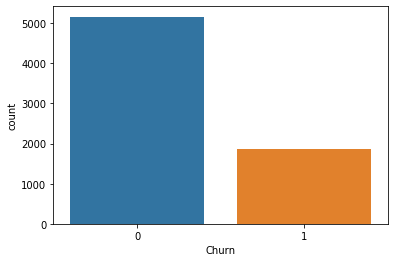

In [82]:
sns.countplot(x='Churn', data=dummy_df)

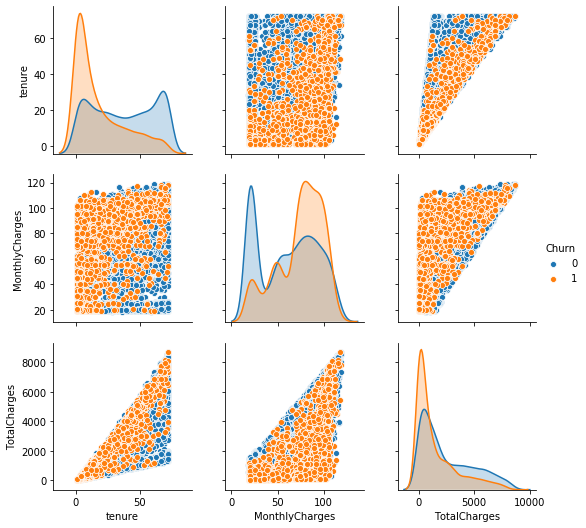

In [84]:
sns.pairplot(dummy_df, vars = ['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn')

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Femal

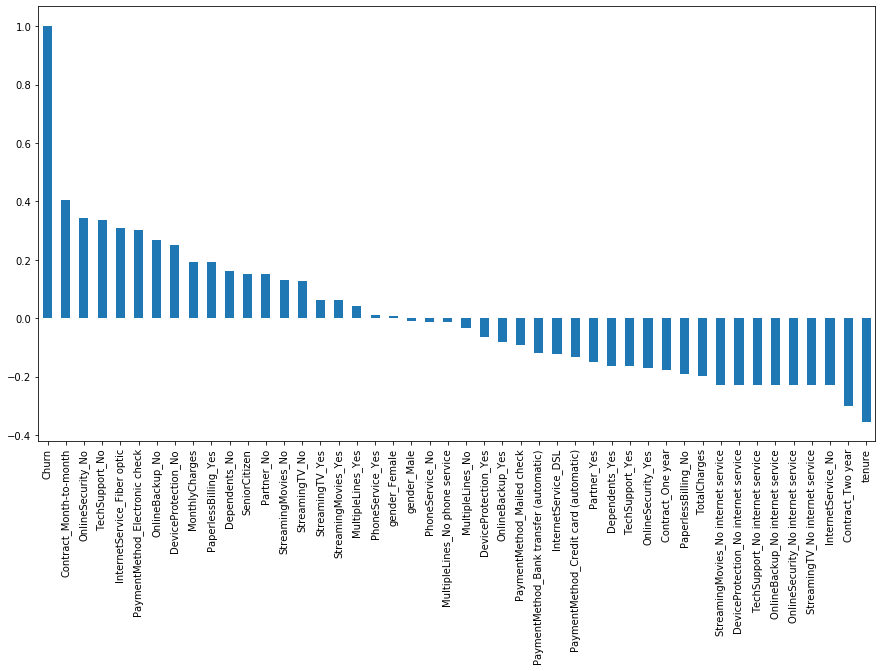

In [81]:
#Correlation of Churn with all other variables
plt.figure(figsize=(15, 8))
print(dummy_df.corr()['Churn'].sort_values(ascending = False))
dummy_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Month to month contract, No online security, No tech support positively correlate with churn. Which means services absence of these services highly motivates customers to churn.
While parameters like "contract_two_year", tenure etc. negatively correlate with churn which means that customers with two year of contract are highly unlikely to churn.
Some of the parameters like "InternetService_Fiber optic" and "PaymentMethod_Electronic check" which makes the internet service faster and easy to pay the bill respectively correlates positively with churn.

### Machine Learning Models

#### 1. Logistic Regression

In [0]:
Y = dummy_df['Churn'].values
X = dummy_df.drop('Churn', axis=1)

#normalize the dataset
from sklearn import preprocessing
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_normalized = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_normalized)

#Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=99)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
#Accuracy for Logistic Regression
from sklearn import metrics
Y_pred = model.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.819431279620853


#### 2. Support Vector Machine (SVM)

In [74]:
from sklearn.svm import SVC
model_svm = SVC(kernel='linear')
model_svm.fit(X_train, Y_train)
Y_pred = model_svm.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.8161137440758294


In [73]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[1437  141]
 [ 247  285]]


#### 3. Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, Y_train)
Y_pred = model_rf.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.8146919431279621


#### 4. XG Boost

In [76]:
from xgboost import XGBClassifier
model_xg = XGBClassifier()
model_xg.fit(X_train, Y_train)
Y_pred = model_xg.predict(X_test)
print(metrics.accuracy_score(Y_test, Y_pred))

0.8251184834123223


In [77]:
confusion_matrix(Y_test, Y_pred)

array([[1449,  129],
       [ 240,  292]])

XG Boost gives the highest accuracy of 82.5%. So, of all the models XG Boost is highly likely to give the best results.

### Conclusions
#### 1. Sex has no impact on churn.
#### 2. People having month-to-month contract tend to churn more than people having long term contracts.
#### 3. As the tenure increases, the probability of churn decreases.
#### 4. As monthly charges increases, the probability of churn increases.